In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import tensorflow as tf

In [3]:
from dataset import Dataset

In [4]:
classes = ['C', 'G', 'H', 'nothing', 'Q', 'space']
export_path = '../data/asl_final/'

In [5]:
SEED = 42
tf.random.set_seed(SEED)

In [6]:
classic_data = Dataset(split_threshold=0, batch_size=30, path='../data/asl_classic/asl_classic', seed=SEED)

Found 87000 files belonging to 29 classes.
Found 87000 files belonging to 29 classes.


In [7]:
real_data = Dataset(split_threshold=0, batch_size=15, path='../data/asl_real/asl_real', seed=SEED)

Found 870 files belonging to 29 classes.
Found 870 files belonging to 29 classes.


In [8]:
device_data = Dataset(split_threshold=0, batch_size=18, path='../data/asl_device/asl_device', labels=classes, seed=SEED)

Found 120 files belonging to 6 classes.
Found 120 files belonging to 6 classes.


In [9]:
classic_data.select_classes(classes)
real_data.select_classes(classes)

In [10]:
classic_data.preprocess(resize=True, crop=True)
real_data.preprocess(resize=True, crop=False)
device_data.preprocess(resize=True, crop=False)

In [11]:
classic_data.train.element_spec, real_data.train.element_spec, device_data.train.element_spec

((TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int32, name=None)),
 (TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int32, name=None)),
 (TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int32, name=None)))

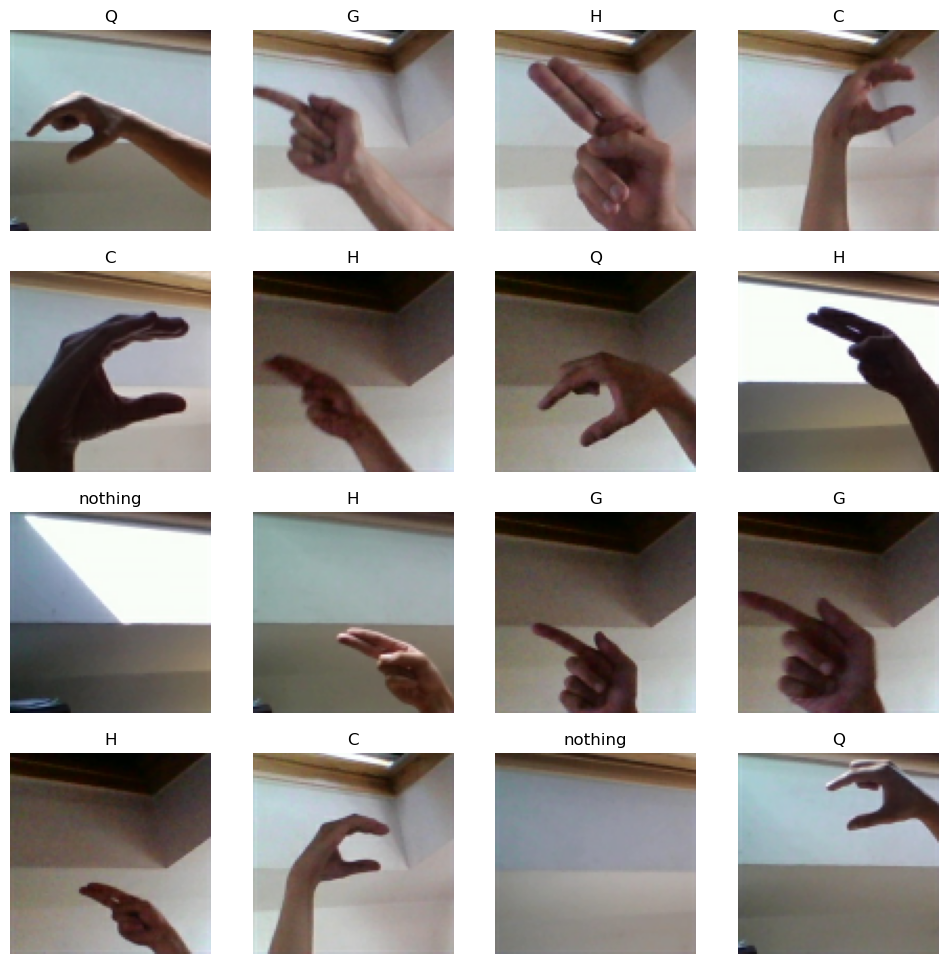

In [12]:
classic_data.visualize_images('train', num_images=4)

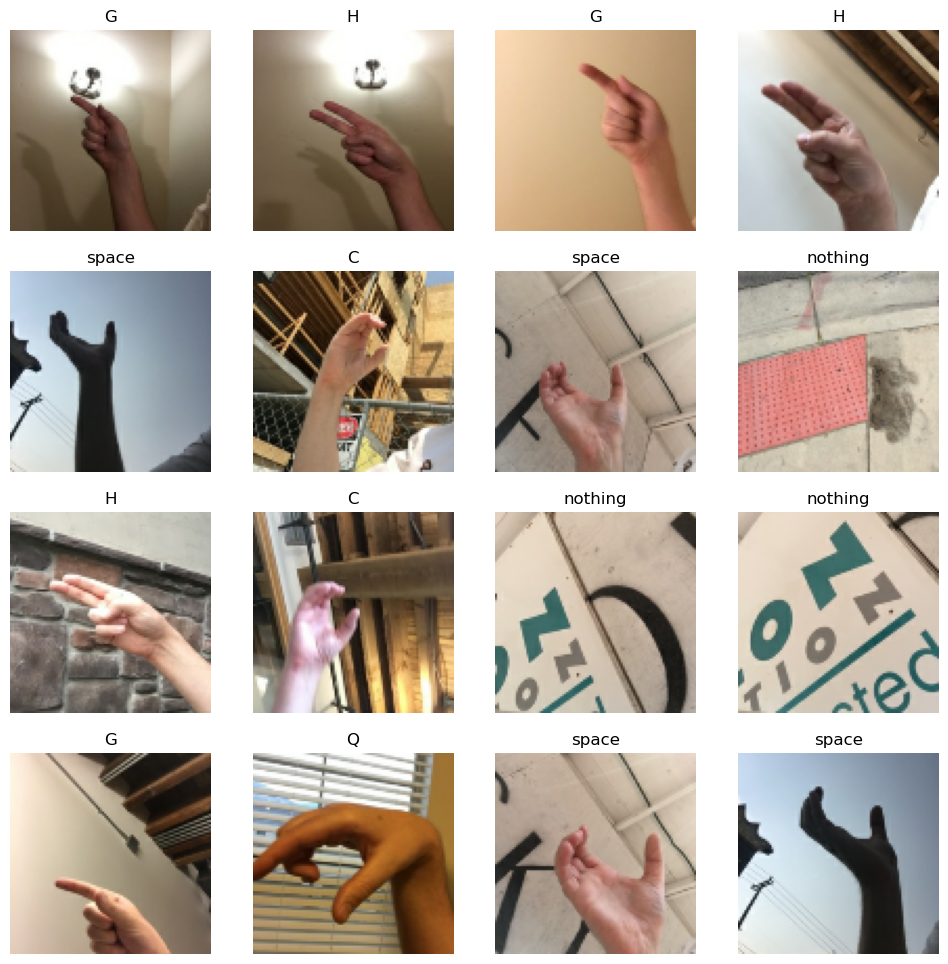

In [13]:
real_data.visualize_images('train', num_images=4)

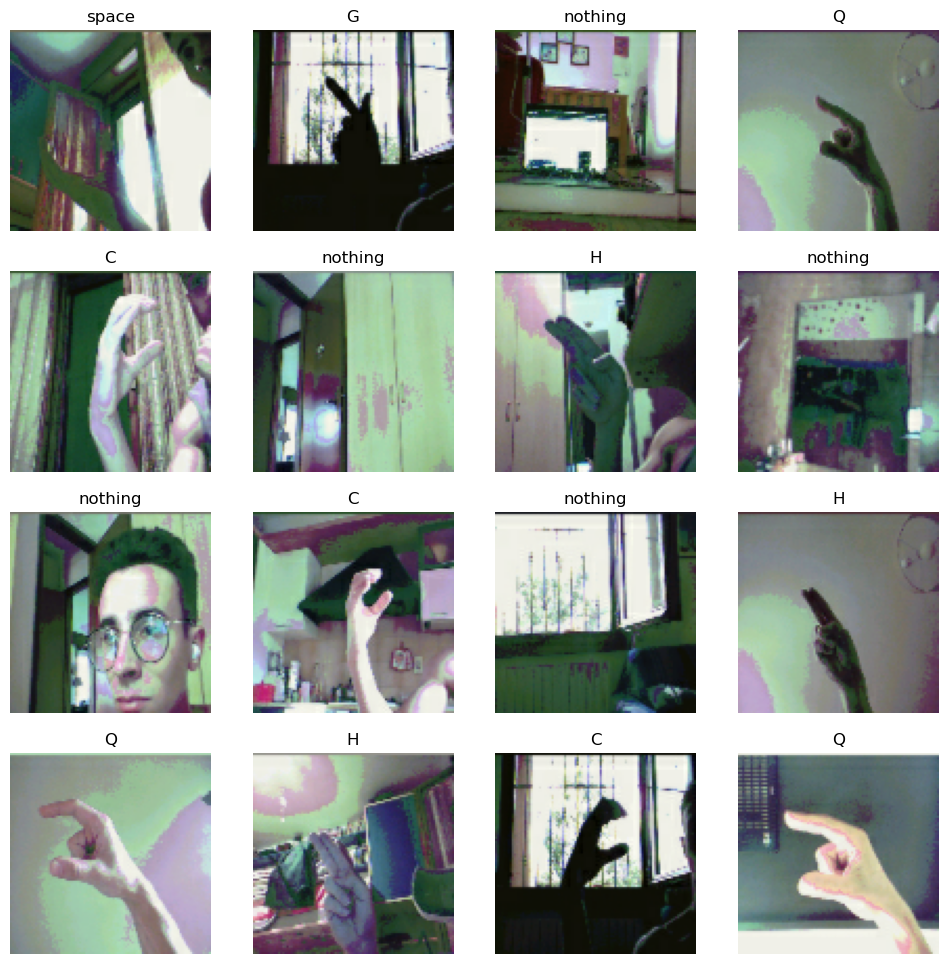

In [14]:
device_data.visualize_images('train', num_images=4)

In [15]:
classic_data.export('train', export_path, tag='classic', subsample=True)

18000it [00:49, 361.74it/s] 

Saving complete.


In [16]:
real_data.export('train', export_path, tag='real', subsample=False)

180it [00:00, 194.35it/s]

Saving complete.


In [17]:
device_data.export('train', export_path, tag='device', subsample=False)

120it [00:00, 441.14it/s]

Saving complete.
